# BDA학회 데이터 분석 모델링반 (ML2) 3주차 복습과제

제출자 성명: 이승섭89

3주차 코드 복습합니다.

Python 3.10.14 버전을 사용합니다.

In [8]:
# Import relevant libraries

import numpy as np
import matplotlib.pyplot as plt

from numpy import linalg
from sklearn.datasets import make_blobs

In [9]:
# Set data
np.random.seed(42)
X1 = np.random.randn(20,2) + np.array([2,2])
X2 = np.random.randn(20,2) + np.array([-2,-2])

X = np.vstack([X1, X2])
y = np.hstack((np.ones(20), -np.ones(20)))

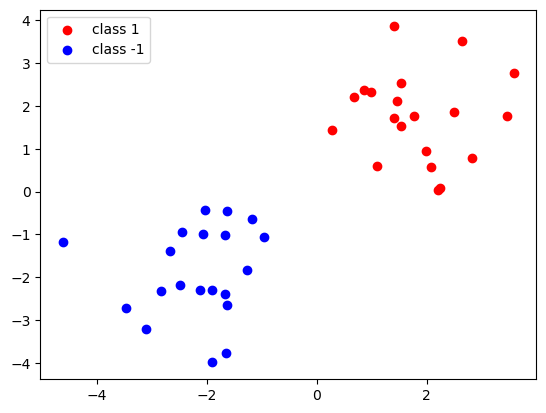

In [10]:
# Visualize data

plt.scatter(X[y==1,0], X[y==1,1], color='r', label = "class 1")
plt.scatter(X[y==-1,0], X[y==-1,1], color='b', label = "class -1")
plt.legend()
plt.show()

In [11]:
# Create SVM class (soft margin)
# Collected various kernels and methods in one class for easier access

class own_SVM:
    def __init__(self, C=1.0, max_iter=1000, tol=1e-5, kernel='linear', degree=3, gamma=None):
        self.C = C
        self.max_iter = max_iter
        self.tol = tol
        self.kernel = kernel
        self.degree = degree
        self.gamma = gamma
        self.alpha = None
        self.w = None
        self.b = 0

    def linear_kernel(self, x1, x2):
        return np.dot(x1, x2)

    def polynomial_kernel(self, x1, x2):
        return (1 + np.dot(x1, x2)) ** self.degree

    def rbf_kernel(self, x1, x2):
        if self.gamma is None:
            self.gamma = 1 / x1.shape[0]
        return np.exp(-self.gamma * np.linalg.norm(x1 - x2) ** 2)

    def kernel_op(self, X):
        n_samples = X.shape[0]
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                if self.kernel == 'linear':
                    K[i, j] = self.linear_kernel(X[i], X[j])
                elif self.kernel == 'poly':
                    K[i, j] = self.polynomial_kernel(X[i], X[j])
                elif self.kernel == 'rbf':
                    K[i, j] = self.rbf_kernel(X[i], X[j])
        return K

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.alpha = np.zeros(n_samples)

        # Calculate kernel matrix
        K = self.kernel_op(X)
        for _ in range(self.max_iter):
            alpha_prev = np.copy(self.alpha)
            for i in range(n_samples):
                j = np.random.randint(0, n_samples)
                if i == j:
                    continue # Exclude the same data point
                
                # Calculate eta for i and j
                eta = 2 * K[i, j] - K[i, i] - K[j, j]
                if eta >= 0:
                    continue # eta must be negative
                
                # Update alpha
                self.alpha[i] = self.alpha[i] - (y[i] * (K[i, j] * self.alpha[j] - y[i] * y[j])) / eta
                
                # Constrain alpha
                self.alpha[i] = max(0, min(self.C, self.alpha[i]))
            
            # End condition
            diff = np.linalg.norm(self.alpha - alpha_prev)  # calculate the difference between the previous alpha and the current alpha
            if diff < self.tol:
                break  # End if the difference is smaller than the tolerance
        
        # Compute the weight vector w and bias b
        self.w = np.zeros(n_features)  # Initialize the weight vector w
        for i in range(n_samples):
            self.w += self.alpha[i] * y[i] * X[i]  # w = sum(alpha_i * y_i * X_i)
        self.b = np.mean([y[i] - np.dot(self.w, X[i]) for i in range(n_samples)])

    def plot(self, X, y):
        plt.scatter(X[y == 1, 0], X[y == 1, 1], color='r', label="class 1")
        plt.scatter(X[y == -1, 0], X[y == -1, 1], color='b', label="class -1")

        x_plot = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
        y_plot = -(self.w[0] * x_plot + self.b) / self.w[1]
        plt.plot(x_plot, y_plot, color='g', label="decision boundary")
        plt.legend()
        plt.show()

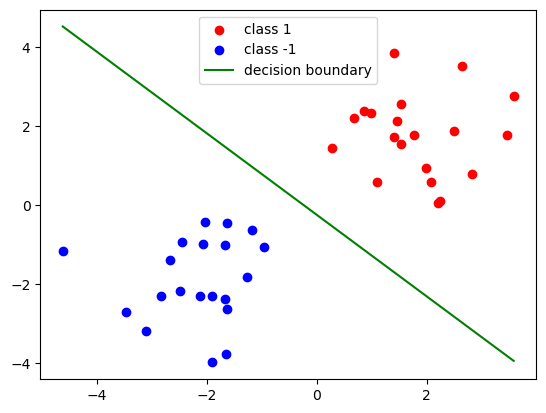

In [12]:
# Implement SVM instance with linear kernel
svm = own_SVM(kernel='linear')
svm.fit(X, y)
svm.plot(X, y)

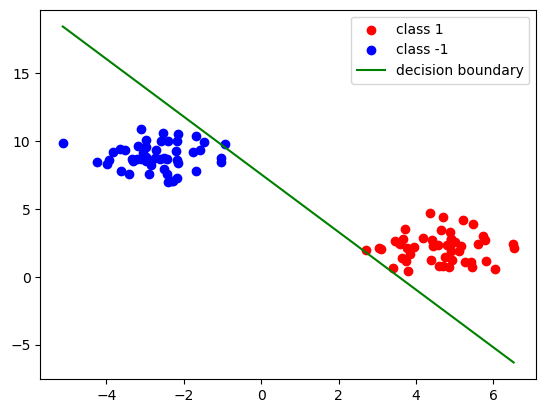

In [13]:

# Implement SVM instance with polynomial kernel
X, y = make_blobs(n_samples=100, centers=2, random_state=42)
y = np.where(y == 0, -1, 1)

svm_poly = own_SVM(kernel='poly', degree=3)
svm_poly.fit(X, y)
svm_poly.plot(X, y)

In [7]:
# Blank cell for running entire notebook.